<center><b><font face="Californian FB" size=6 color=556677>Name - Khushboo Patel</font></b><br><br>
    <b><font face="Californian FB" size=6 color=556677>Student ID - 989354961</font></b><br><br>
    <b><font face="Californian FB" size=6 color=556677>Topic Name - Divine Dine </font></b></center>

<center><b><font face="Century" size=6 color=blue>CONTENTS</font></b><br><br></center>
    <font face="Colonna MT" size=6 color=green>1. OBJECTIVE</font><br><br>
    <font face="Colonna MT" size=6 color=green>2. DATA EXPLORATION</font><br><br>
    <font face="Colonna MT" size=6 color=green>3. DENDROGRAM</font><br><br>
    <font face="Colonna MT" size=6 color=green>4. STEP BY STEP K MEANS</font><br><br>
    <font face="Colonna MT" size=6 color=green>5. SKLEARN.CLUSTER</font><br><br>
    <font face="Colonna MT" size=6 color=green>6. PREDICTION</font><br><br>
    <font face="Colonna MT" size=6 color=green>7. 2D PREDICTION MESH</font><br><br>
    <font face="Colonna MT" size=6 color=green>8. SUMMARY</font><br><br>

<center><font face="Algerian" size=8 color=purple>1. Objective</font></center>

Food is one of the basic necessity to survive. Poeple possess various food habits depending on their environment, inheritence and many other factors. Food has various effect on person's behavious.

The following analysis includes factors like food choice, food calories, student's characterisitcs like weight, gender, employement, fathers profession, marital status, comfort in food and its reasons, favourite cuisine, current diet, change in eating habits, food they had in childhood, ideal diet. It also has calories of different food items like indian food, tortillas, italian food, chicken, turkey and waffle. It provide predicrability and certainity when food is categorized into certain order. Hence, we have done clustering of data which can be used to understand a minset of individual in relation with the food traits.

This analytics report will help them to find the relation between all the above goven factors so that all-you-can-eat buffet at the University of the Pacific can provide coupons to their students to encourage them to come. Hope next year many students will join University of Pacific and will coupons will be one of the reasons for it.


 

# Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas import Series,DataFrame
from matplotlib import pyplot as plt
from pandas import *
import matplotlib.pyplot as plt
from numpy.random import rand
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


//anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plotting', 'array', 'datetime', 'unique', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<center><font face="Algerian" size=8 color=purple>2. DATA EXPLORATION</font></center>

# Loading the CSV File

In [9]:
d=pd.read_csv("food_coded.csv")

# 2.1 Top 5 Rows and Bottom 10 Rows

In [10]:
d.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [11]:
d.tail(10)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
115,3.3,2,1,610,4.0,980.0,2,"chocolate bar, ice cream, pretzels, potato chi...","Stress, boredom and physical activity",NaN,...,1.0,1.0,1,1165.0,690,Hockey,2,2,1315,150
116,3.4,1,1,610,NaN,420.0,2,"Ice cream, chocolate, pizza, cucumber","loneliness, homework, boredom",NaN,...,1.0,2.0,5,725.0,345,none,5,1,1315,170
117,3.77,1,1,610,NaN,315.0,2,"Noodle ( any kinds of noodle), Tuna sandwich, ...",When i'm eating with my close friends/ Food s...,NaN,...,1.0,2.0,5,725.0,690,"No, I don't play sport.",3,1,760,113
118,3.63,1,1,430,3.0,420.0,1,"Chinese, chips, cake",Stress and boredom,NaN,...,1.0,2.0,4,940.0,345,None,5,2,1315,140
119,3.2,2,1,610,3.0,420.0,2,"chips, rice, chicken curry,","Happiness, boredom, social event",NaN,...,1.0,1.0,5,1165.0,690,Soccer,5,2,1315,185
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135
124,3.9,1,1,430,NaN,315.0,2,"Chocolates, pizza, and Ritz.","hormones, Premenstrual syndrome.",NaN,...,1.0,2.0,2,725.0,345,NaN,4,2,575,135


## 2.1.1 Explanation

Here we have used <b>head</b> and <b>tail</b> syntax to find the top rows and bottom rows respectively. The number in the bracket represents how many rows to display.

# 2.2 Data Cleaning

In [12]:
ddrop=d.dropna()
ddrop.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137


In [13]:
ddrop.shape

(52, 61)

## 2.2.1 Explanation

Here we have dropped all the rows where there is any NA value by using drop.na command and we found the number of rows and columns by using shape command. <br>
    Number of columns: 61 <br>
    Number of rows before drop.na: 125 <br>
    Number of rows after drop.na : 51
    

# 2.3 Food DataFrame

In [14]:
k1=Series(ddrop['thai_food'])
k2=Series(ddrop['indian_food'])
k3=Series(ddrop['italian_food'])
df = pd.DataFrame(ddrop, columns = ['thai_food','indian_food','italian_food'])
dfh=df.head(10)
dfh

,thai_food,indian_food,italian_food
1,2,4,4
2,5,5,5
4,4,2,5
6,5,5,5
7,1,1,3
9,4,4,5
10,2,1,5
11,5,5,5
12,3,3,4
13,5,3,5


## 2.3.1 Explanation

Here we have used <b> Series </b> and <b> Dataframe </b> command to make a new dataframe of selected columns. 

# 2.4 DataFrame Transpose

In [15]:
t=df.transpose()
t

,1,2,4,6,7,9,10,11,12,13,...,78,79,81,84,85,86,87,91,96,103
thai_food,2,5,4,5,1,4,2,5,3,5,...,3,5,4,5,3,4,1,1,3,3
indian_food,4,5,2,5,1,4,1,5,3,3,...,3,4,4,5,2,4,1,1,3,5
italian_food,4,5,5,5,3,5,5,5,4,5,...,4,5,5,5,5,5,5,4,5,5


<center><font face="Algerian" size=8 color=purple>3. DENDROGRAM</font></center>

# 3.1 Dendrogram

In [16]:
df = pd.DataFrame(ddrop, columns = ['thai_food','indian_food','italian_food'])

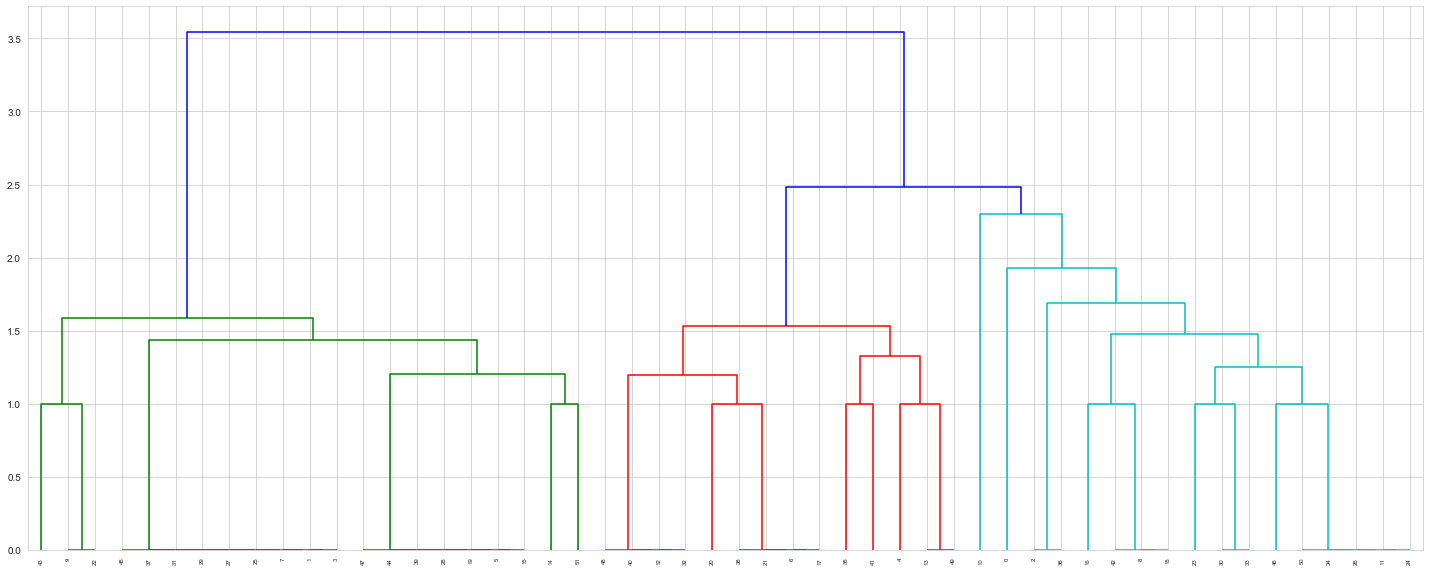

In [17]:
Z = linkage(df, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

## 3.1.1 Explanation:

To create dendogram, we have make a dataframe first and then used linkage function. Here we have prepared dendogram for the columns calories chicken, tortilla calories, turkey calories and waffle calories. <br>


# 3.2 Elbow Method for different value of K

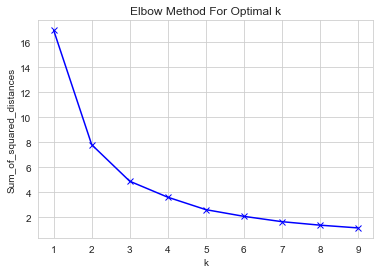

In [18]:
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## 3.2.1 Explanation:

To know the kvalue we have used elbow method, and from the graph shown above it is shown that the value of k = 2.

<center><font face="Algerian" size=8 color=purple>4. STEP BY STEP K MEANS</font></center>

# 4.1 Random Centroids and KMEANS() Function 

In [19]:
c1 = np.array([4,4,5])
c2 = np.array([5,5,5])
c3 = np.array([4,4,4])
print(c1, c2, c3)

[4 4 5] [5 5 5] [4 4 4]


In [20]:
def KMEANS(c1,c2,c3,dataframe,k):
    dataframe = df
    k=3
    df["d1"] = np.sqrt((df.thai_food - c1[0])**2 
                             + (df.indian_food - c1[1])**2
                            +(df.italian_food - c1[2])**2)
    
    
    df["d2"] = np.sqrt((df.thai_food - c2[0])**2 
                             + (df.indian_food - c2[1])**2
                            +(df.italian_food - c2[2])**2)
    
    
    df["d3"] = np.sqrt((df.thai_food - c3[0])**2 
                             + (df.indian_food - c3[1])**2
                            +(df.italian_food - c3[2])**2)

    df["Association"] = np.where( (df.d1 < df.d2) & (df.d1 < df.d3), 1, np.where((df.d2 < df.d1) & 
    (df.d2 < df.d3) , 2, 3))

    cen1 = df[df.Association == 1][["thai_food","indian_food","italian_food"]].mean()
    cen2 = df[df.Association == 2][["thai_food","indian_food","italian_food"]].mean()
    cen3 = df[df.Association == 3][["thai_food","indian_food","italian_food"]].mean()
    
    return(cen1,cen2,cen3)


# 4.2 Iterations

## 4.2.1 First Iteration

In [21]:
dataframe = df
dfi=KMEANS(c1,c2,c3,dataframe,k=3)

dfi

(thai_food       2.933333
 indian_food     2.533333
 italian_food    5.000000
 dtype: float64, thai_food       5.0
 indian_food     5.0
 italian_food    5.0
 dtype: float64, thai_food       2.615385
 indian_food     2.538462
 italian_food    3.923077
 dtype: float64)

## 4.2.2 Second Iteration

In [22]:
dataframe = df
dfi2 = KMEANS(dfi[0],dfi[1],dfi[2], dataframe,k)
dfi2

(thai_food       2.35
 indian_food     1.85
 italian_food    5.00
 dtype: float64, thai_food       4.523810
 indian_food     4.428571
 italian_food    5.000000
 dtype: float64, thai_food       2.272727
 indian_food     2.181818
 italian_food    3.727273
 dtype: float64)

## 4.2.3 Third Iteration

In [23]:
dataframe = df
dfi3 = KMEANS(dfi2[0],dfi2[1],dfi2[2],dataframe,k)
dfi3

(thai_food       2.35
 indian_food     1.85
 italian_food    5.00
 dtype: float64, thai_food       4.523810
 indian_food     4.428571
 italian_food    5.000000
 dtype: float64, thai_food       2.272727
 indian_food     2.181818
 italian_food    3.727273
 dtype: float64)

# 4.3 Associations

## 4.3.1 First Association

In [24]:
df[df.Association == 1]

,thai_food,indian_food,italian_food,d1,d2,d3,Association
4,4,2,5,1.656804,2.484419,2.153222,1
10,2,1,5,0.919239,4.257313,1.758098,1
17,3,3,5,1.320984,2.088734,1.678744,1
18,1,1,5,1.595306,4.916537,2.153222,1
26,2,1,5,0.919239,4.257313,1.758098,1
34,3,1,5,1.070047,3.751946,1.882938,1
35,2,1,5,0.919239,4.257313,1.758098,1
38,2,3,5,1.202082,2.900074,1.537412,1
40,3,3,5,1.320984,2.088734,1.678744,1
46,3,3,5,1.320984,2.088734,1.678744,1


## 4.3.2 Second Association

In [25]:
df[df.Association == 2]

,thai_food,indian_food,italian_food,d1,d2,d3,Association
2,5,5,5,4.116430,0.743833,4.123106,2
6,5,5,5,4.116430,0.743833,4.123106,2
9,4,4,5,2.710166,0.676794,2.812311,2
11,5,5,5,4.116430,0.743833,4.123106,2
13,5,3,5,2.888771,1.505847,3.118858,2
22,4,5,5,3.555981,0.775182,3.541956,2
23,4,4,5,2.710166,0.676794,2.812311,2
31,4,4,5,2.710166,0.676794,2.812311,2
37,5,3,5,2.888771,1.505847,3.118858,2
44,5,5,5,4.116430,0.743833,4.123106,2


## 4.3.2 Third Association

In [26]:
df[df.Association == 3]

,thai_food,indian_food,italian_food,d1,d2,d3,Association
1,2,4,4,2.396873,2.748325,1.858641,3
7,1,1,3,2.558320,5.307762,1.882938,3
12,3,3,4,1.656804,2.315775,1.128152,3
14,4,2,3,2.597114,3.189410,1.882938,3
20,1,1,4,1.882817,5.017204,1.758098,3
25,3,3,3,2.396873,2.891853,1.314257,3
27,3,3,4,1.656804,2.315775,1.128152,3
67,2,2,4,1.070047,3.642468,0.426401,3
77,2,1,4,1.358308,4.373182,1.243163,3
78,3,3,4,1.656804,2.315775,1.128152,3


### Explanation

<ul><li><p>First, the <b>Random Centroids</b> are established, then its followed by <b>KMEANS()</b> function which accepts the <b>DataFrame</b> and return the <b>K, the number of clusters</b> in <b>4.1</b>.</p></li>
    <li><p>The Centroid stop moving after the <b>Third Iteration</b>, the Values are shown in from <b>4.2.1</b> to <b>4.2.3</b>.</p></li>
    <li><p>The Asscoiations of the Values are shown in <b>4.3</b>.</p></li></ul>

<center><font face="Algerian" size=8 color=purple>5. sklearn.cluster</font></center>

In [27]:
df=df.loc[:,['thai_food','indian_food','italian_food']]
dmo = KMeans(n_clusters = 3)
dmo.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
from scipy.cluster.hierarchy import fcluster
k=3
dend_clusters = fcluster(Z, k, criterion='maxclust')
dend_clusters

array([3, 1, 3, 1, 2, 1, 2, 1, 3, 1, 3, 3, 2, 2, 1, 1, 3, 2, 3, 1, 2, 2,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 2, 3, 3, 2, 3, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 3, 1, 2, 2, 3, 1], dtype=int32)

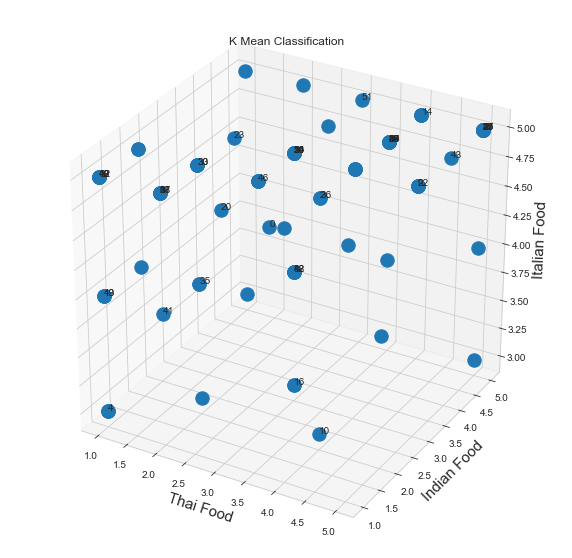

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = d.thai_food, ys = d.indian_food, zs = d.italian_food, s= 180, depthshade = False)
ax.set_xlabel('Thai Food', fontsize = 15)
ax.set_ylabel('Indian Food', fontsize = 15)
ax.set_zlabel('Italian Food', fontsize = 15)
plt.title('K Mean Classification')
for x, y, z,l in zip(df.thai_food,df.indian_food,df.italian_food,d.index):
    ax.text(x, y, z,l)
plt.show()

## Explanation

<ul><li><p>The <b>KMeans</b> is one of the Function of <b>sklearn.cluster</b> Library which is used for clustering purpose. Here we have prepared a 3D model of 3 columns which are Thai food, Indian Food and Italian Food. Here we have imported fcluster from scipy.cluster.hierarchy to prepare the cluster for the k value=3.

<center><font face="Algerian" size=8 color=purple>6. PREDICTION</font></center>

In [30]:
def prediction(Thai, Indian, Italian):
    map1=np.array(['Cluster 1','Cluster 2','Cluster 3'])
    dclass = dmo.predict(np.array([Thai, Indian, Italian]).reshape(1, -1))[0]
    return (map1[dclass])

for i in range(1,11):
    Thai = float(input('thai_food :'))
    Indian = float(input('indian_food : '))
    Italian = float(input('italian_food :'))
    clusters = prediction(Thai, Indian, Italian)
    print(i)
    print(clusters)
    if clusters=='Cluster 1':
        print("5$ Coupon")
    elif clusters=='Cluster 2':
        print("10$ Coupon")
    else:
        print("20$ Coupon")
    print("=======")

thai_food :1
indian_food : 2
italian_food :3
1
Cluster 2
10$ Coupon
thai_food :3
indian_food : 4
italian_food :5
2
Cluster 3
20$ Coupon
thai_food :2
indian_food : 3
italian_food :5
3
Cluster 3
20$ Coupon
thai_food :2
indian_food : 3
italian_food :5
4
Cluster 3
20$ Coupon
thai_food :4
indian_food : 4
italian_food :4
5
Cluster 1
5$ Coupon
thai_food :6
indian_food : 4
italian_food :7
6
Cluster 1
5$ Coupon
thai_food :8
indian_food : 7
italian_food :6
7
Cluster 1
5$ Coupon
thai_food :9
indian_food : 4
italian_food :3
8
Cluster 1
5$ Coupon
thai_food :7
indian_food : 3
italian_food :4
9
Cluster 1
5$ Coupon
thai_food :9
indian_food : 7
italian_food :45
10
Cluster 1
5$ Coupon


## Explanation

Here, we have created a function to predict the category of the student by the food they like. Depending on their likings for thai food, Indian food and italian food, we can classify them into different clusters which will be shown at the end. 

<center><font face="Algerian" size=8 color=purple>7. 2D PREDICTION MESH</font></center>

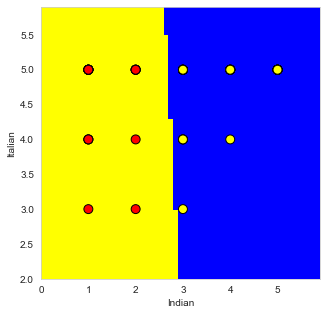

In [47]:
def MeshPlot(): 
    
    df2=df.loc[:,['indian_food','italian_food']]
    dmo2 = KMeans(n_clusters = 2)
    dmo2.fit(df2)
    dmo2.labels_
    
    h = 0.1
    
    cmap_light = ListedColormap(['blue', 'yellow']) 
    colormap = np.array(['yellow', 'red'])

    x_min, x_max = df2.indian_food.min() - 1, df2.indian_food.max() + 1
    y_min, y_max = df2.italian_food.min() - 1, df2.italian_food.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = dmo2.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(5,5))
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    plt.scatter(df2.indian_food,df2.italian_food, c = colormap[dmo2.labels_], edgecolor = 'black', s = 80)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Indian')
    plt.ylabel('Italian') 

MeshPlot()

<center><font face="Algerian" size=8 color=purple>8. SUMMARY</font></center>

The above report analysed the differnt food likings, habits, calories and characteristic of the student of University of Pacific so that we can predict the coupon which can be given to them to make them happy. It also provides information which are irrelevant like fathers income,  employment, type of sport and many others. These informations are not completely irrelevant but it has very less effect on other variables. Hence, by this report one can find food habit, food choice, calories consumed, weight and many more.